# Data Visualization and Descriptive Statistics

## Time Dimension

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set(color_codes=True)

def string_to_datetime(s, fmt='%Y-%m-%d'):
    if s != s:
        return np.nan
    year, month, day = s.split('-')
    try:  
        d = pd.datetime(int(year), int(month), int(day))
    except ValueError:
        d = pd.datetime(2017, 1, 1)
    d = min([max([d, pd.datetime(2013, 1, 1)]), pd.datetime(2017, 1, 1)])
    return d

In [24]:
# Read and transform dates
train = pd.read_csv("../data/train.csv", usecols=['date_time', 'is_booking', 'srch_ci', 'srch_co'],
                   parse_dates=['date_time'])
train['srch_ci'] = train['srch_ci'].apply(string_to_datetime)
train['srch_co'] = train['srch_co'].apply(string_to_datetime)
train_bookings = train[train['is_booking'] == 1].drop('is_booking', axis=1)
train_clicks = train[train['is_booking'] == 0].drop('is_booking', axis=1)
del train
test_bookings = pd.read_csv("../data/test.csv", usecols=['date_time', 'srch_ci', 'srch_co'],
                   parse_dates=['date_time'])
test_bookings['srch_ci'] = test_bookings['srch_ci'].apply(string_to_datetime)
test_bookings['srch_co'] = test_bookings['srch_co'].apply(string_to_datetime)

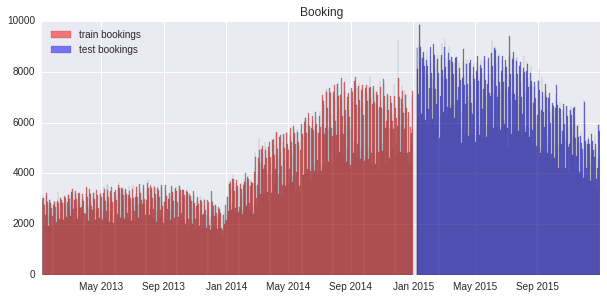

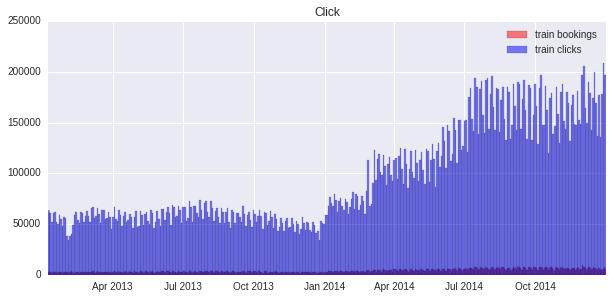

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.subplot(211)
plt.hist(train_bookings['date_time'].values, bins=730, alpha=0.5, normed=False, facecolor = 'red', label='train bookings')
plt.hist(test_bookings['date_time'].values, bins=365, alpha=0.5, normed=False, facecolor = 'blue', label='test bookings')
plt.title('Booking')
plt.legend(loc='best')
plt.show()

plt.subplot(211)
plt.title('Click')
plt.hist(train_bookings['date_time'].values, bins=730, alpha=0.5, normed=False, facecolor = 'red', label='train bookings')
plt.hist(train_clicks['date_time'].values, bins=365, alpha=0.5, normed=False, facecolor = 'blue', label='train clicks')
plt.legend(loc='best')
plt.show()

## Hotel Clusters

In [8]:
import sqlite3
import os
import heapq
import json
import numpy as np
import pandas as pd
from datetime import datetime
from collections import OrderedDict

rootdir=os.path.join('../')
datadir=os.path.join('../database')
file=os.path.join(datadir,'expedia.db')
conn= sqlite3.connect(file)
c=conn.cursor()

def get_value_count(feature_name, is_booking = True):
    if is_booking:
        c.execute("SELECT %s,COUNT(user_id) FROM train where is_booking = '1' GROUP BY %s" % (feature_name, feature_name))
    else:
        c.execute('SELECT %s,COUNT(user_id) FROM train GROUP BY %s' % (feature_name, feature_name))
    result=c.fetchall()
    return result

In [9]:
result = get_value_count('hotel_cluster')

In [10]:
from heapq import nlargest
ordered_result = nlargest(len(result), result, key = lambda x: x[1])

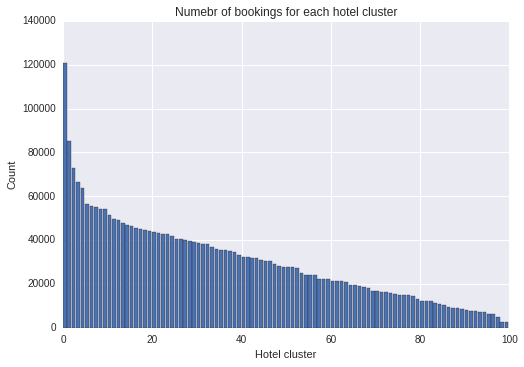

In [15]:
plt.xlabel('Hotel cluster')
plt.ylabel('Count')
plt.title('Numebr of bookings for each hotel cluster')
plt.bar(range(len(result)), map(lambda x: x[1], ordered_result))
plt.show()

## Is_booking

In [16]:
result = get_value_count('is_booking', False)

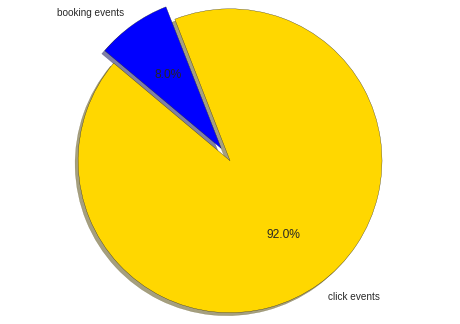

In [21]:
labels = ['click events', 'booking events']
explode = [0.1, 0]
colors = ['gold', 'blue']
plt.pie(map(lambda x: x[1], result), explode=explode, colors=colors, labels=labels,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Search Related

In [22]:
srch_dest_result = get_value_count('srch_destination_id', False)

In [23]:
len(srch_dest_result)

59455

In [24]:
nlargest(5, srch_dest_result, key = lambda x: int(x[0]))

[(u'65107', 1), (u'65104', 3), (u'65103', 6), (u'65102', 4), (u'65098', 3)]